In [ ]:
import matplotlib.pyplot as plt
import numpy as np

C:\Users\dpomi\AppData\Local\Temp\ipykernel_38140\1884765799.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(results[:, 0], results[:, 1], cmap='viridis', alpha=0.5)


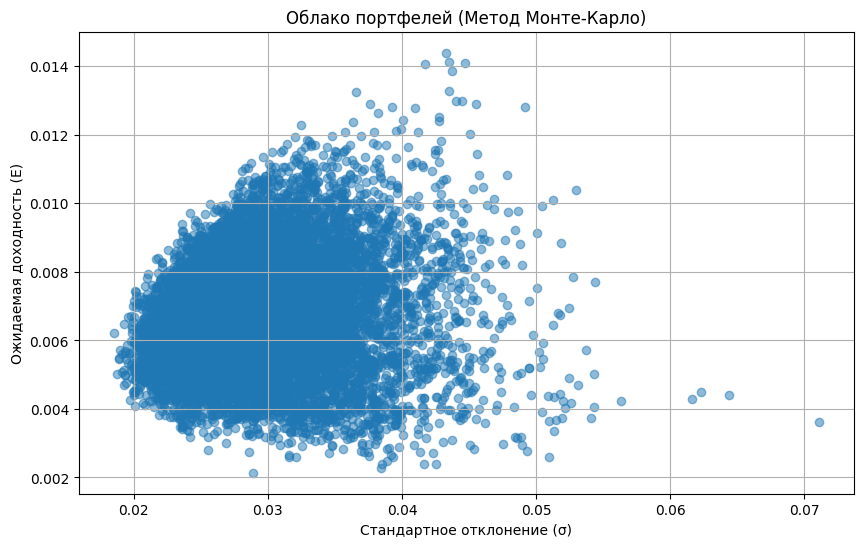

In [ ]:
# Данные из файла
cov_matrix = np.array([
    [0.0005, 0.000293, 0.000115, 4e-05, 3e-05, 0.000264],
    [0.000293, 0.001634, 0.00057, -4.9e-05, -0.00022, 1.3e-05],
    [0.000115, 0.00057, 0.00909, 0.000707, 0.00079, 0.000492],
    [4e-05, -4.9e-05, 0.000707, 0.001042, 0.000848, 0.000581],
    [3e-05, -0.00022, 0.00079, 0.000848, 0.001199, 0.00072],
    [0.000264, 1.3e-05, 0.000492, 0.000581, 0.00072, 0.004937]
])

expected_returns = np.array([0.007325, 0.00743, 0.001999, 0.003123, 0.000343, 0.0207])

# Параметры симуляции
num_portfolios = 10000
results = np.zeros((num_portfolios, 2))

# Генерация случайных портфелей
for i in range(num_portfolios):
    weights = np.random.random(6)
    weights /= np.sum(weights) #сумма весов = 1
    
    # Ожидаемая доходность портфеля
    portfolio_return = np.dot(weights, expected_returns)
    
    # Стандартное отклонение портфеля
    #X^T*C*X
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    results[i] = [portfolio_std, portfolio_return]

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(results[:, 0], results[:, 1], cmap='viridis', alpha=0.5)
plt.xlabel('Стандартное отклонение (σ)')
plt.ylabel('Ожидаемая доходность (E)')
plt.title('Облако портфелей (Метод Монте-Карло)')
plt.grid(True)
plt.show()